<a href="https://colab.research.google.com/github/ALMerrill/cs474_labs_f2019/blob/master/DL_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6: Sequence-to-sequence models

## Description:
For this lab, you will code up the [char-rnn model of Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). This is a recurrent neural network that is trained probabilistically on sequences of characters, and that can then be used to sample new sequences that are like the original.

This lab will help you develop several new skills, as well as understand some best practices needed for building large models. In addition, we'll be able to create networks that generate neat text!

## There are two parts of this lab:
###  1.   Wiring up a basic sequence-to-sequence computation graph
###  2.   Implementing your own GRU cell.


An example of my final samples are shown below (more detail in the
final section of this writeup), after 150 passes through the data.
Please generate about 15 samples for each dataset.

<code>
And ifte thin forgision forward thene over up to a fear not your
And freitions, which is great God. Behold these are the loss sub
And ache with the Lord hath bloes, which was done to the holy Gr
And appeicis arm vinimonahites strong in name, to doth piseling 
And miniquithers these words, he commanded order not; neither sa
And min for many would happine even to the earth, to said unto m
And mie first be traditions? Behold, you, because it was a sound
And from tike ended the Lamanites had administered, and I say bi
</code>


---

## Part 0: Readings, data loading, and high level training

---

There is a tutorial here that will help build out scaffolding code, and get an understanding of using sequences in pytorch.

* Read the following

> * [Pytorch sequence-to-sequence tutorial](https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html)
* [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)






In [1]:
! wget -O ./text_files.tar.gz 'https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz' 
! tar -xzf text_files.tar.gz
! pip install unidecode
! pip install torch
import torch

def char_tensor(string):
  tensor = torch.zeros(len(string)).long()
  for c in range(len(string)):
      tensor[c] = all_characters.index(string[c])
  return tensor


--2019-10-19 21:00:38--  https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz
Resolving piazza.com (piazza.com)... 34.205.95.128, 3.214.17.10, 52.2.48.133, ...
Connecting to piazza.com (piazza.com)|34.205.95.128|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://d1b10bmlvqabco.cloudfront.net/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz [following]
--2019-10-19 21:00:39--  https://d1b10bmlvqabco.cloudfront.net/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz
Resolving d1b10bmlvqabco.cloudfront.net (d1b10bmlvqabco.cloudfront.net)... 99.86.61.162, 99.86.61.17, 99.86.61.143, ...
Connecting to d1b10bmlvqabco.cloudfront.net (d1b10bmlvqabco.cloudfront.net)|99.86.61.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1533290 (1.5M) [application/x-gzip]
Saving to: ‘./text_files.tar.gz’

./text_files.tar.gz 100%[======

In [0]:
import unidecode
import string
import random
import re
import pdb
from torch.utils.data import Dataset, DataLoader

all_characters = string.printable
n_characters = len(all_characters)


class TextDataset(Dataset):
  def __init__(self, chunk_len=200, file_name='./text_files/lotr.txt'):
    self.chunk_len = chunk_len
    self.file = unidecode.unidecode(open(file_name).read())
    self.file = self.file.replace('\n',' ')
    self.len = len(self.file)
  
  def __getitem__(self):
    pass
  
  def __len__(self):
    return self.len
  
  def random_training_set(self):    
    chunk = self.random_chunk(self.chunk_len)
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target
  
  def random_chunk(self, chunk_len):
    start_index = random.randint(0, self.len - chunk_len)
    end_index = start_index + chunk_len + 1
    return self.file[start_index:end_index]
  



---

## Part 4: Creating your own GRU cell 

**(Come back to this later - its defined here so that the GRU will be defined before it is used)**

---

The cell that you used in Part 1 was a pre-defined Pytorch layer. Now, write your own GRU class using the same parameters as the built-in Pytorch class does.

Please try not to look at the GRU cell definition. The answer is right there in the code, and in theory, you could just cut-and-paste it. This bit is on your honor!

**TODO:**
* Create a custom GRU cell

**DONE:**
* Create a custom GRU cell


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Parameter
from torch.nn.init import xavier_normal_

device = torch.device("cuda") 

class GRU(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(GRU, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    
    self.sigmoid = nn.Sigmoid()
    self.tanh = nn.Tanh()
    self.W_xr = Parameter(xavier_normal_(torch.zeros((input_size, hidden_size))))
    self.W_hr = Parameter(xavier_normal_(torch.zeros((input_size, hidden_size))))
    self.W_xz = Parameter(xavier_normal_(torch.zeros((input_size, hidden_size))))
    self.W_hz = Parameter(xavier_normal_(torch.zeros((hidden_size, hidden_size))))
    self.W_xh = Parameter(xavier_normal_(torch.zeros((input_size, hidden_size))))
    self.W_hh = Parameter(xavier_normal_(torch.zeros((hidden_size, hidden_size))))
    self.b_r = 1
    self.b_z = 1
    self.b_h = 1

    
  
  def forward(self, inputs, hidden):
    r_t = self.sigmoid(torch.matmul(inputs, self.W_xr) + torch.matmul(hidden, self.W_hr) + self.b_r)
    z_t = self.sigmoid(torch.matmul(inputs, self.W_xz) + torch.matmul(hidden, self.W_hz) + self.b_z)
    ht_t = self.tanh(torch.matmul(inputs, self.W_xh) + torch.matmul(r_t * hidden, self.W_hh) + self.b_h)
    h_t = (z_t * hidden) + ((1 - z_t) * ht_t)
    hiddens = hidden #with more layers this would be all of the hidden layers for each t
    return h_t, hiddens
  


---

##  Part 1: Building a sequence to sequence model

---

Great! We have the data in a useable form. We can switch out which text file we are reading from, and trying to simulate.

We now want to build out an RNN model, in this section, we will use all built in Pytorch pieces when building our RNN class.


**TODO:**
* Create an RNN class that extends from nn.Module.

**DONE:**

* Create an RNN class that extends from nn.Module.

In [0]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, n_layers=1):
    super(RNN, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.n_layers = n_layers
    
    self.embedding = nn.Embedding(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.gru = GRU(input_size, hidden_size, n_layers)
    self.out_layer = nn.Linear(hidden_size, output_size)

  def forward(self, input_char, hidden):
    embedding = self.embedding(input_char).view(1,1,-1)
    output, h = self.gru(embedding, hidden)
    out_decoded = self.relu(self.out_layer(output))
    return out_decoded, h

  def init_hidden(self):
    return torch.zeros(self.n_layers, 1, self.hidden_size)

---

## Part 2: Sample text and Training information

---

We now want to be able to train our network, and sample text after training.

This function outlines how training a sequence style network goes. 

**TODO:**
* Fill in the pieces.

**DONE:**

* Fill in the pieces.


In [0]:
import time
from matplotlib import pyplot as plt

hidden_size = n_characters
in_size = n_characters
out_size = n_characters
n_layers = 1

decoder = RNN(in_size, hidden_size, out_size).to(device)

def train(decoder, lr, file_name):
  train_dataset = TextDataset(file_name=file_name)
  optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
  objective = nn.CrossEntropyLoss()

  losses = []
  optimizer.zero_grad()
  hidden = decoder.init_hidden()
  n_epochs = 1000
  print_every = 100
  plot_every = 250
  start = time.time()
  running_loss = 0
  for epoch in range(1, n_epochs + 1):
    running_loss = 0
    optimizer.zero_grad()
    decoder.train()
    input_string, target_string = train_dataset.random_training_set()
    for char, target_char in zip(input_string, target_string):
      char = char.to(device)
      hidden = hidden.to(device)
      out_char, hidden = decoder(char, hidden)
      running_loss += objective(out_char.squeeze(0).to(device), target_char.unsqueeze(0).to(device))
    loss = running_loss / len(target_string)
    losses.append(loss)
    running_loss.backward(retain_graph=True)
    optimizer.step()

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time.time() - start, epoch, epoch / n_epochs * 100, loss))
        decoder.eval()
        print(evaluate(decoder, 'Wh', 100), '\n')

    if epoch % plot_every == 0:
        plt.plot(range(len(losses)), losses)
        plt.xlabel("Epoch: {}".format(epoch))
        plt.ylabel("Loss")
        plt.show()
         
train(decoder , .001, './text_files/lotr.txt')

---

## Part 3: Sample text and Training information

---

You can at this time, if you choose, also write out your train loop boilerplate that samples random sequences and trains your RNN. This will be helpful to have working before writing your own GRU class.

If you are finished training, or during training, and you want to sample from the network you may consider using the following function. If your RNN model is instantiated as `decoder`then this will probabilistically sample a sequence of length `predict_len`

**TODO:**
* Fill out the evaluate function to generate text frome a primed string

**DONE:**
* Fill out the evaluate function to generate text from a primed string


In [0]:
sftmx = nn.Softmax(dim=0)

def evaluate(decoder, prime_str='A', predict_len=100, temperature=0.8):
  hidden = decoder.init_hidden()
  input_str = char_tensor(prime_str)
  
  for i in range(len(input_str) - 1):
    _, hidden = decoder(input_str[i].to(device), hidden.to(device))
    
  eval_input = input_str[-1]
  
  predicted = prime_str
  for char in range(predict_len):
    out, hidden = decoder(eval_input.to(device), hidden.to(device))
    distribution = out.view(-1)
    probs = distribution / temperature
    sftmx_probs = sftmx(probs)
    candidate = torch.multinomial(sftmx_probs, 1)[0]
    next_char = all_characters[candidate]
    eval_input = char_tensor(next_char)
    predicted += next_char
    
  return predicted
  

---

## Part 4: (Create a GRU cell, requirements above)

---



---

## Part 5: Run it and generate some text!

---

Assuming everything has gone well, you should be able to run the main function in the scaffold code, using either your custom GRU cell or the built in layer, and see output something like this. I trained on the “lotr.txt” dataset, using chunk_length=200, hidden_size=100 for 2000 epochs gave.

**TODO:** 
* Create some cool output

**DONE:**

* Create some "cool" output


In [7]:
for i in range(10):
  start_strings = [" Th", " wh", " he", " I ", " ca", " G", " lo", " ra"]
  start = random.randint(0,len(start_strings)-1)
  print(start_strings[start])
#   all_characters.index(string[c])
  print(evaluate(decoder, start_strings[start], 200), '\n')

 he
 he  her heyowad a t asthou, tanom st t he was aleledlle tuthe dint f ththe t we gheg, the d at iths inghe vesl me im wowe d  7d f s e athe hingof heePe ad tof thet o the inghe llin  henelf blo alyougrt  

 wh
 wherey s, t le d  the avern, ithe yong hengoI -age at sthem anemoothe frn wed f ofe ofoug ithes thedo  helowangrid(w  r thin win4o at  ain mowam l  uthin  sust in'Xhen t helen  ang the t lof  theche n  

 G
 Gutrthing aveset hed tlern lf t cowoaregore l be /rsthentlfor r s be s  an your thad heds hathed ouloller bern seng wire ofaloon  tousthinond waitothe d be sthe Vabe  ad, o s o tinit tthior w oule ingh 

 lo
 lowaded thin' thed, t the t hern ad Ateee te inofr tng h t sthewhowars fand he thed le ted th s d tthe hand fo =One sthe th fadverdi3t t,  dXyovele ourere wen t sit we, be s n to Elomitomeristhe  g n 

 Th
 Thinowey t ave out  en,  m undedau ingu  sowid lave at arenghe wid st he t s rred igam race cong msssllllllort Do   ghe /n torom she t thiry ollid t  me the 

---

## Part 6: Generate output on a different dataset

---

**TODO:**

* Choose a textual dataset. Here are some [text datasets](https://www.kaggle.com/datasets?tags=14104-text+data%2C13205-text+mining) from Kaggle 

* Generate some decent looking results and evaluate your model's performance (say what it did well / not so well)

**DONE:**
* Choose a textual dataset. Here are some [text datasets](https://www.kaggle.com/datasets?tags=14104-text+data%2C13205-text+mining) from Kaggle 

* Generate some decent looking results and evaluate your model's performance (say what it did well / not so well)

So my model is definitely not doing as well as I'd hoped. But I'm happy that I at lesat got things set up and that it is at least lowering the loss to some degree, and getting rid of the crazy jumbled symbols and such. However, I messed around with it for a long time and was not able to get it to lower hte loss more and look more like english. I am out of time today, so I'll have to accept this. But it was a fun project to work on, and hopefully it is subjectively good enough :) I think it did at least get the general format of sentances coming out, and some real words show up.


[48.55402207374573 (100 10%) 3.3531]
Wh5e fen him }5\9 araa tin BA/An tod nqonthenen wOV,s ta="e -`0@GloTho1- e 	Doetamn rVanUme tank&thio 

[97.24976563453674 (200 20%) 3.1489]
Whedir i'''''''[uroe the herd %.inor.Aen$`ptheme nd othikoke f t mearde tth awin Win ched g\@on ahed t 



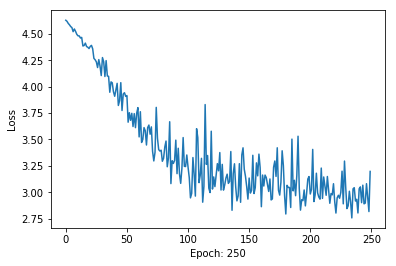

[146.30780625343323 (300 30%) 3.0051]
Whe''& thi5leren$he onencoCbfocare lalller f te f onton zppPaghind iAnun orof cg terea f " hizolPthir  

[194.88957595825195 (400 40%) 3.0408]
Wha of #.ve _/xi\ar perin t we (2" t tViLof +ngerin Wad an f ieFe kealere inke o opathil thichenoere91 

[244.7617208957672 (500 50%) 2.7118]
Whe tlinWe icingherdes alon in'?''''''Inakang us" wamaned alatnen*olganee witmalilt fur firerr "we ils 



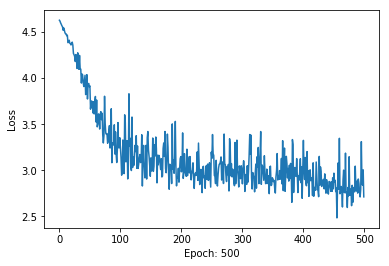

[294.42123889923096 (600 60%) 2.7008]
Whenthicist ace on the tthuis wareng ronick)]ro}9Ulrere thecowherores in sions n ingn tast qthe tith h 

[344.80396127700806 (700 70%) 2.9760]
Whis cin barinorennd-ofrt bes thes ches oupic Genx k bastthicich the then a'Nergan tithe int th wa cat 



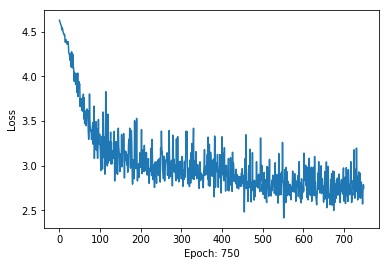

[432.6540973186493 (800 80%) 2.7032]
Whis thimame <anthen 
, k phof mis f n the pearngrersind t sier ara s sen cericentsthe s se t'.....clt 

[482.80067133903503 (900 90%) 2.6306]
Whick t `3 lerer e haga is h inors f his more wat, Sear tr f Pathedise'Brorng Yis ca 19U/mis cuss "''H 

[533.8721253871918 (1000 100%) 2.7032]
Whor an ghis It", hithe cofours t ome o _80 thard w tathidgme it wofonoofis an ouna s thor wa s ) __0^ 



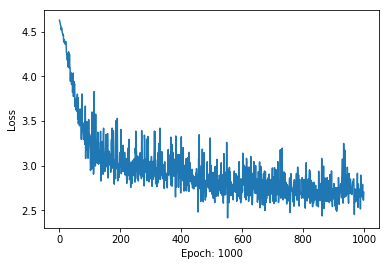

In [10]:
train(decoder , .001, 'jeopardy.txt')

In [11]:
for i in range(10):
  start_strings = [" Th", " wh", " he", " I ", " ca", " G", " lo", " ra"]
  start = random.randint(0,len(start_strings)-1)
  print(start_strings[start])
#   all_characters.index(string[c])
  print(evaluate(decoder, start_strings[start], 200), '\n')

 lo
 lor tethirin thatt foucofon d baselin >" soes an amet is ord owangu wis''mendupeale m opumme t Hofanoll s ist ofer of think Ba ) ats w tsthisuNeis thesesolowineld hiraluthes'sthichin ra, thelatoth iemas 

 lo
 lor be t lerollest is become one is t t ttis a dinis p >s alleeaOAck wa rouan thatha/; tarnin thores scm deld'tll''meria ww 4kinolaredan he, pe "'s thil t d agerche e />
ulas'~in wm us tor ofom hitics  

 ra
 ra ss toulians medas or 2'''s *ulure forus nd poprinineke th d ite''''''''''''''d t'_//2 ongis t anted, is j-Arathindinan'''''s t''s ide a cofean on be" te "
`Urtormme ler thermesenele mer in ne biseri 

 wh
_Jaris irer t ththale e wal"5Kat an iane andin ledindr torthin" inorselleputhe atis 101\., f thithese apl d t cop orortord a 

 G
 Gof ge fofug"819qurgerss thias te tholinges pous on >_blalaEncer'''''cof fis te a d tudkicel Rpesteadnsis talas n pa fera s .ceree tor d thaorxs ordan w.Raut tsesa0 sed o dd fas ists fr, "hed]ofo tos w 

 wh
 whe "''''''s chedoneredr i